# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
test_data = pd.merge(mouse_metadata, study_results, how='right')

# Display the data table for preview
test_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [4]:
# Checking the number of mice.
mice_count = len(test_data["Mouse ID"].unique())
mice_count

249

In [19]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = test_data[test_data.duplicated(['Mouse ID', 'Timepoint'], keep=False)]

duplicates['Mouse ID'].unique()


array(['g989'], dtype=object)

In [26]:
# Optional: Get all the data for the duplicate mouse ID.
test_data[test_data['Mouse ID'] == 'g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [27]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = test_data[test_data['Mouse ID'] != 'g989']
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [28]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()

248

## Summary Statistics

In [36]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

mean_tumor_volume = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_tumor_volume = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
tumor_volume_variance = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
tumor_volume_std_dev = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
tumor_volume_sem = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

tumor_data = {
    'Mean Tumor Volume': mean_tumor_volume,
    'Median Tumor Volume': median_tumor_volume,
    'Tumor Volume Variance': tumor_volume_variance,
    'Tumor Volume Std. Dev.': tumor_volume_std_dev,
    'Tumor Volume Std. Err.': tumor_volume_sem
}
tumor_df = pd.DataFrame(tumor_data)

tumor_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [35]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(('mean', 'median', 'var', 'std', 'sem'))

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

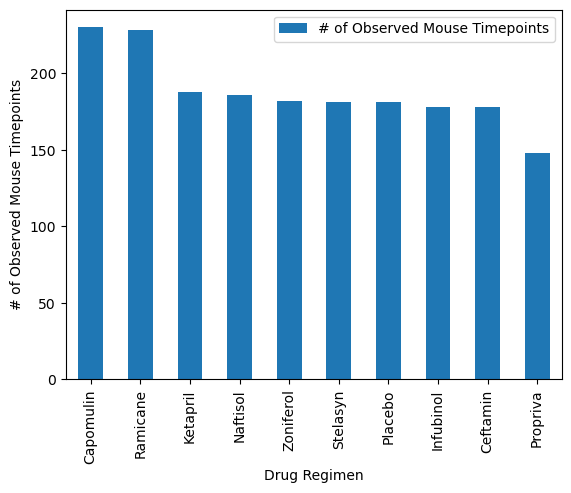

In [37]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# mice_and_drugs = mice_and_drugs.set_index('Drug Regimen')
# mice_and_drugs.plot(kind='bar', rot=90)

bar_df = pd.DataFrame({'# of Observed Mouse Timepoints': clean_df['Drug Regimen'].value_counts()},
                      index=test_data['Drug Regimen'].unique())
bar_df = bar_df.sort_values(by='# of Observed Mouse Timepoints', ascending=False)
bar_df.plot(kind='bar', xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ramicane'),
  Text(2, 0, 'Ketapril'),
  Text(3, 0, 'Naftisol'),
  Text(4, 0, 'Zoniferol'),
  Text(5, 0, 'Stelasyn'),
  Text(6, 0, 'Placebo'),
  Text(7, 0, 'Infubinol'),
  Text(8, 0, 'Ceftamin'),
  Text(9, 0, 'Propriva')])

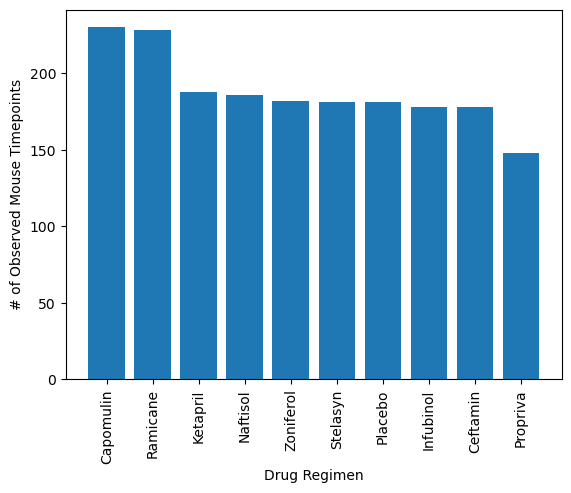

In [38]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(bar_df.index, clean_df['Drug Regimen'].value_counts())
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)

C:\Users\User\AppData\Local\Temp\ipykernel_17184\4256660988.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Count': [gender_counts[0], gender_counts[1]]


<Axes: ylabel='Count'>

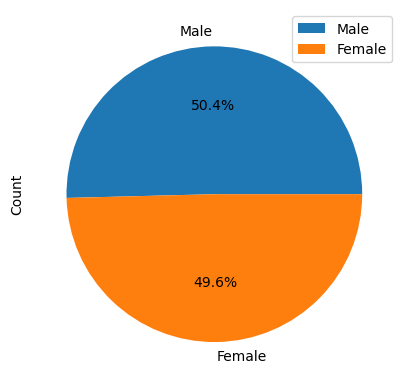

In [65]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
mouse_ids_and_genders = clean_df[['Mouse ID', 'Sex']].copy()
mouse_ids_and_genders.drop_duplicates(subset=['Mouse ID'], inplace=True)

unique_mice = mouse_ids_and_genders['Mouse ID'].unique()
gender_counts = mouse_ids_and_genders['Sex'].value_counts()
data = {
    'Sex': ['Male', 'Female'],
    'Count': [gender_counts[0], gender_counts[1]]
}

# Make the pie chart
gender_df = pd.DataFrame(data=data)
gender_df.plot.pie(y='Count', labels=gender_df['Sex'], autopct='%1.1f%%')

C:\Users\User\AppData\Local\Temp\ipykernel_17184\4213818823.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Count': [gender_counts[0], gender_counts[1]]


Text(0, 0.5, 'Count')

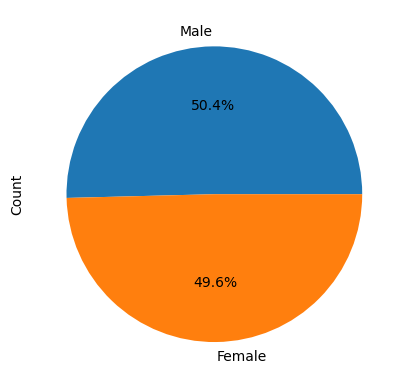

In [66]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
mouse_ids_and_genders = clean_df[['Mouse ID', 'Sex']].copy()
mouse_ids_and_genders.drop_duplicates(subset=['Mouse ID'], inplace=True)

unique_mice = mouse_ids_and_genders['Mouse ID'].unique()
gender_counts = mouse_ids_and_genders['Sex'].value_counts()
data = {
    'Sex': ['Male', 'Female'],
    'Count': [gender_counts[0], gender_counts[1]]
}

# Make the pie chart
plt.pie(x=data['Count'], labels=data['Sex'], autopct='%1.1f%%')
plt.ylabel('Count')

## Quartiles, Outliers and Boxplots

In [170]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_index = clean_df.groupby('Mouse ID')['Timepoint'].idxmax()

max_timepoints = clean_df.loc[max_index]

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_df = pd.merge(clean_df, max_timepoints, how='right')
tumor_df = tumor_df[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Drug Regimen']]
tumor_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Drug Regimen
0,a203,45,67.973419,Infubinol
1,a251,45,65.525743,Infubinol
2,a262,45,70.717621,Placebo
3,a275,45,62.999356,Ceftamin
4,a366,30,63.440686,Stelasyn
...,...,...,...,...
243,z435,10,48.710661,Propriva
244,z578,45,30.638696,Ramicane
245,z581,45,62.754451,Infubinol
246,z795,45,65.741070,Naftisol


In [232]:
# Put treatments into a list for for loop (and later for plot labels)
drug_df = clean_df.groupby('Mouse ID')['Timepoint'].max().reset_index()
drug_treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
mouse_tumor_data = []

drug_df = pd.merge(drug_df, clean_df, on=['Mouse ID', 'Timepoint'])

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in drug_treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    row = drug_df[drug_df['Drug Regimen'] == treatment]
    mouse_tumor_data.append(row['Tumor Volume (mm3)'])

    # add subset
    quartiles = row['Tumor Volume (mm3)'].quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    potential_outliers = row[(row['Tumor Volume (mm3)'] < lower_bound) | (row['Tumor Volume (mm3)'] > upper_bound)]
    print(f"{treatment}'s potential outliers: {potential_outliers['Tumor Volume (mm3)']}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


Text(0, 0.5, 'Tumor Volume (mm3)')

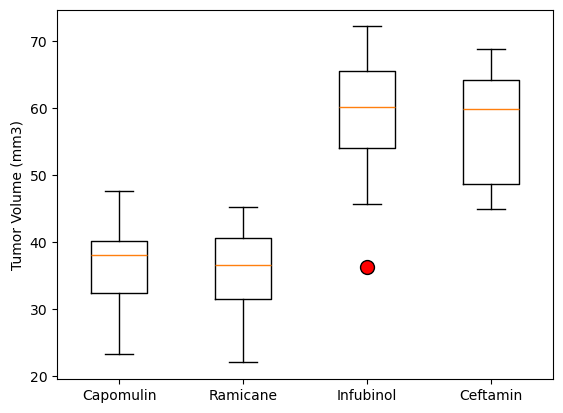

In [234]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.boxplot(mouse_tumor_data, labels=drug_treatments,
            flierprops={'marker': 'o',
                        'markerfacecolor': 'red',
                        'markersize': 10});
plt.ylabel('Tumor Volume (mm3)')

## Line and Scatter Plots

<Axes: title={'center': 'Capomulin treatment of mouse l509'}, xlabel='Timepoint (days)', ylabel='Tumor Volume (mm3)'>

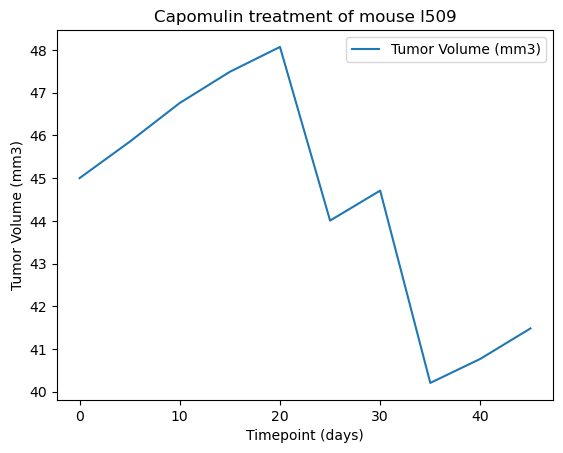

In [235]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse = clean_df[clean_df['Mouse ID'] == 'l509']
mouse.plot(kind='line', x='Timepoint', y='Tumor Volume (mm3)', 
           title='Capomulin treatment of mouse l509',
           xlabel='Timepoint (days)', ylabel='Tumor Volume (mm3)')

Text(0, 0.5, 'Tumor Volume (mm3)')

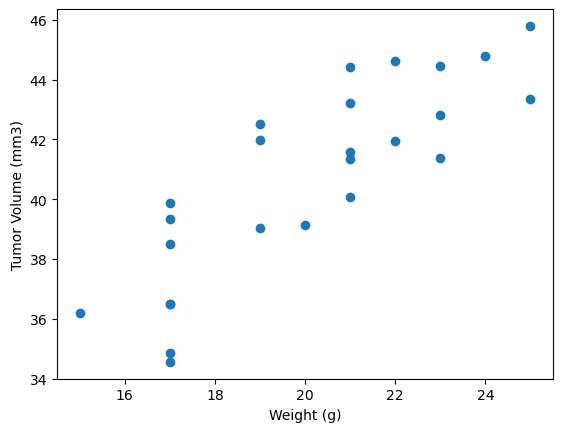

In [236]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
mice = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
avg_tumor_vol = mice['Tumor Volume (mm3)'].mean()
avg_tumor_grp = mice.groupby(['Mouse ID'])[['Tumor Volume (mm3)','Weight (g)']].mean()
tumor_scatter = plt.scatter(x=avg_tumor_grp['Weight (g)'], y=avg_tumor_grp['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

## Correlation and Regression

Text(0, 0.5, 'Tumor Volume (mm3)')

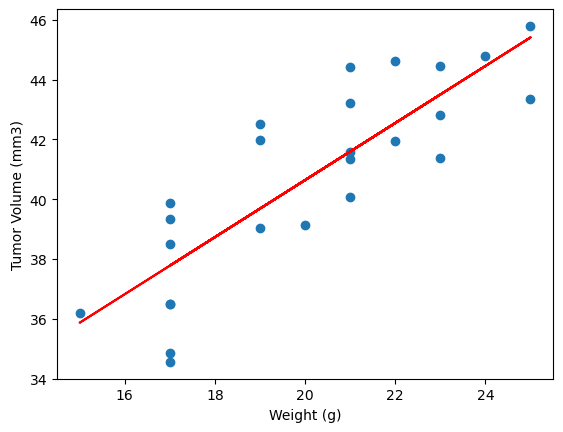

In [237]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_vals = avg_tumor_grp['Weight (g)']
y_vals = avg_tumor_grp['Tumor Volume (mm3)']

correlation = st.pearsonr(x_vals, y_vals)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
regress_values = x_vals * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_vals,y_vals)
plt.plot(x_vals,regress_values,"r-")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

```markdown
Conclusions

- The drug regimens Capomulin and Ramicane appear to be the most effective in reducing tumor volume, as evidenced by their lower tumor volume statistics and fewer potential outliers.
- There is a positive correlation between mouse weight and tumor volume for the Capomulin regimen, suggesting that heavier mice tend to have larger tumors.
- The linear regression analysis for Capomulin indicates a strong relationship between mouse weight and tumor volume, as shown by the correlation coefficient and regression line.
- The study demonstrates the importance of consistent data cleaning and analysis to ensure accurate results, such as removing duplicate entries and identifying potential outliers.
```